In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
main_df = pd.read_csv("water_potability.csv")
df = main_df.copy()

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(df.shape)

(3276, 10)


In [6]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [10]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<AxesSubplot:>

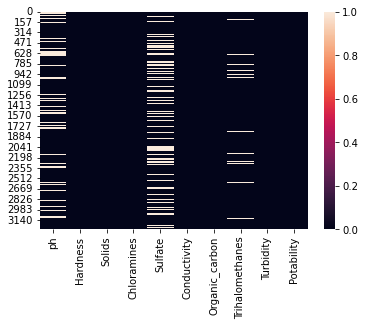

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:>

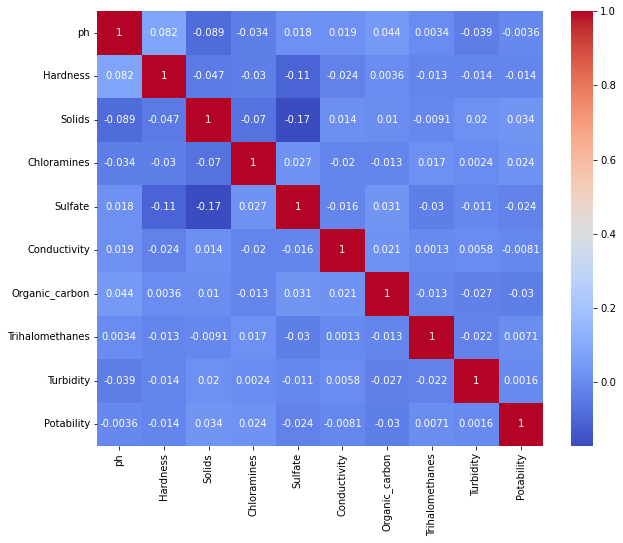

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [14]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

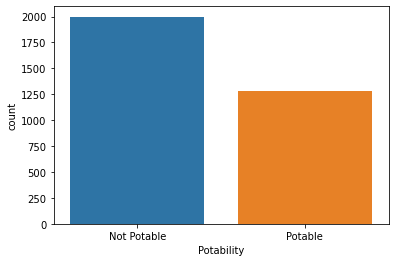

In [15]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [16]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    1998
1    1278
Name: Potability, dtype: int64


<AxesSubplot:xlabel='Potability', ylabel='ph'>

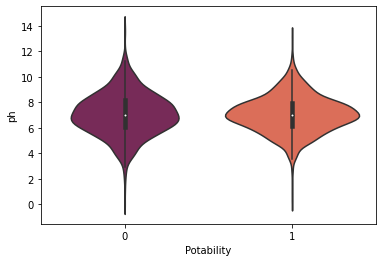

In [17]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

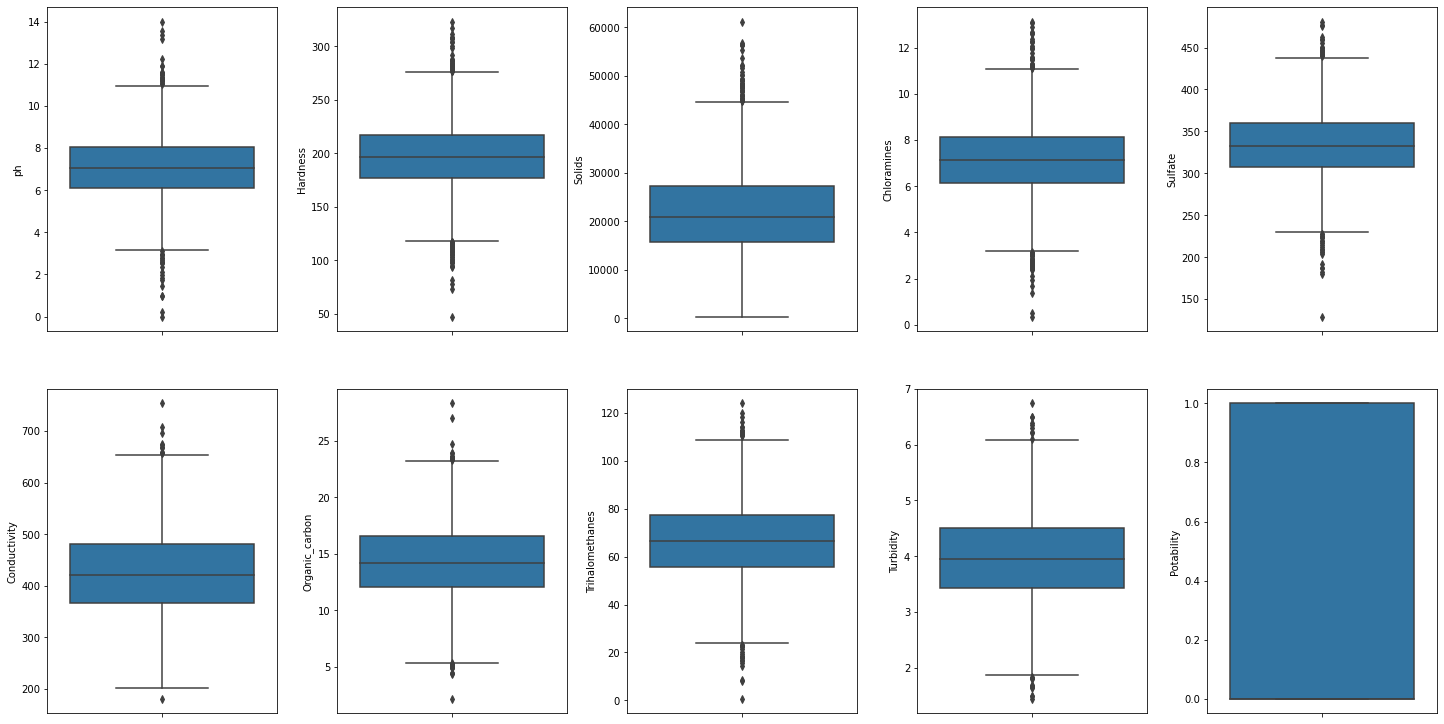

In [18]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

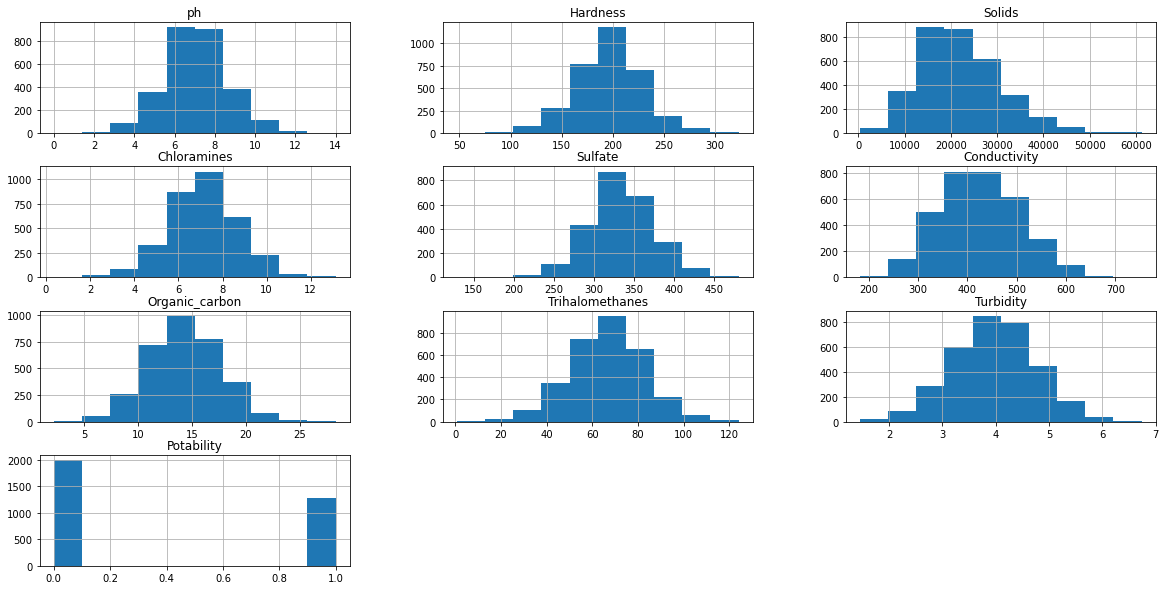

In [19]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

<AxesSubplot:xlabel='Potability', ylabel='Density'>

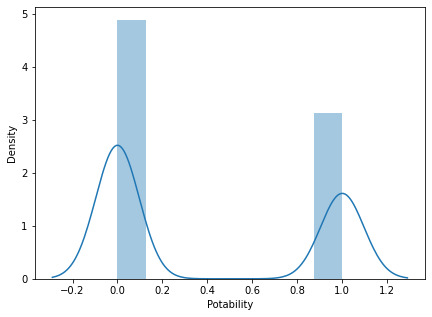

In [20]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

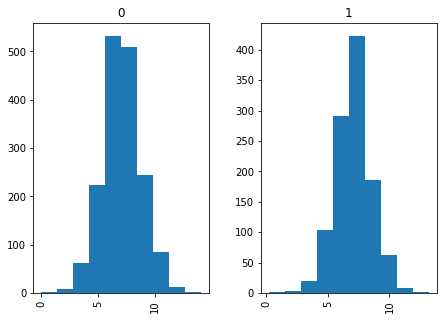

In [21]:
df.hist(column='ph', by='Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

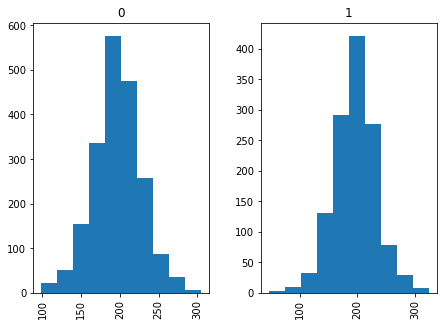

In [22]:
df.hist(column='Hardness', by='Potability')

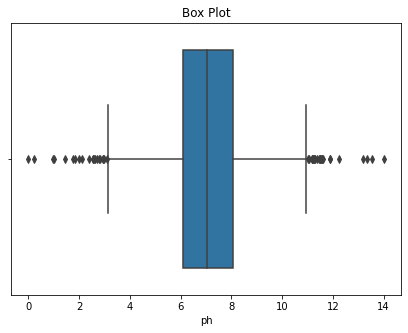

In [23]:
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['ph'])

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

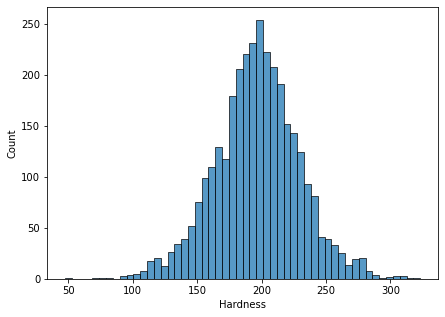

In [24]:
sns.histplot(x = "Hardness", data=df)

In [25]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [26]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

In [27]:
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [28]:
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [29]:
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [30]:
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [31]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [32]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [33]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [34]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [35]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<AxesSubplot:>

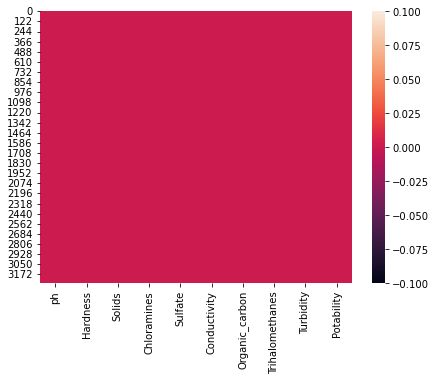

In [36]:
sns.heatmap(df.isnull())

In [37]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [38]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [39]:
X.shape, y.shape

((3276, 9), (3276,))

In [40]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [41]:
X = scaler.fit_transform(X)
X

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [42]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
#USING LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [47]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [48]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [49]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6284658040665434


In [50]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



In [51]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

<AxesSubplot:>

Model  Accuracy_score
0  Logistic Regression        0.628466

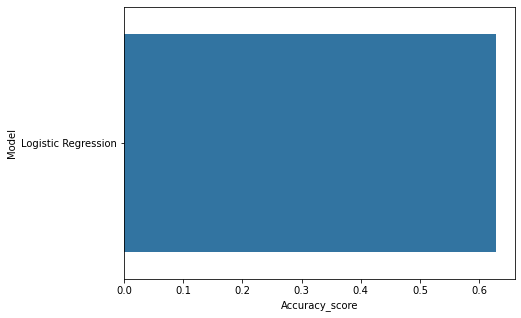

In [52]:
models = pd.DataFrame({
    'Model':['Logistic Regression'],
    'Accuracy_score' :[lg]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [53]:
#USING DECISION TREE CLASSIFIER

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [57]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [59]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6451016635859519


In [60]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



<AxesSubplot:>

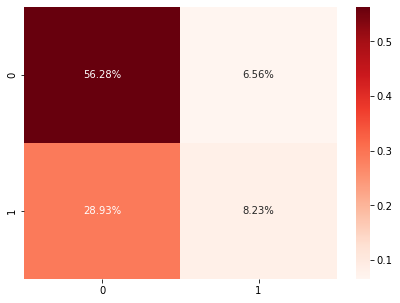

In [61]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

Model  Accuracy_score
0  Decision Tree        0.645102

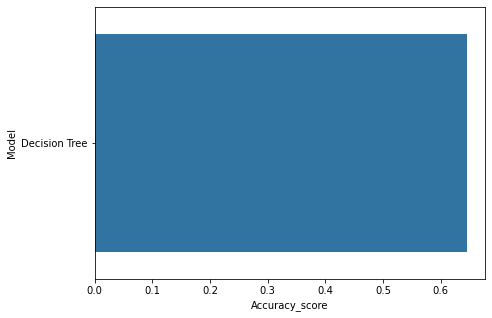

In [62]:
models = pd.DataFrame({
    'Model':['Decision Tree'],
    'Accuracy_score' :[dt]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [63]:
#USING RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [66]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [67]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [68]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6284658040665434


In [69]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

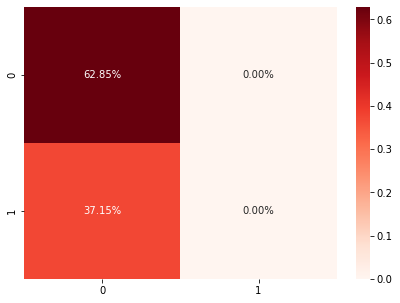

In [70]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

Model  Accuracy_score
0  Random Forest        0.628466

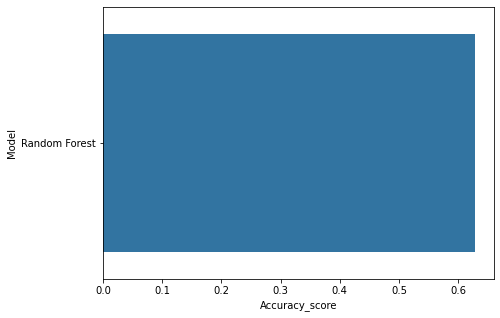

In [71]:
models = pd.DataFrame({
    'Model':['Random Forest'],
    'Accuracy_score' :[rf]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [72]:
#USING SVM

In [73]:
from sklearn.svm import SVC, LinearSVC

In [74]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [75]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [76]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [77]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6885397412199631


<AxesSubplot:>

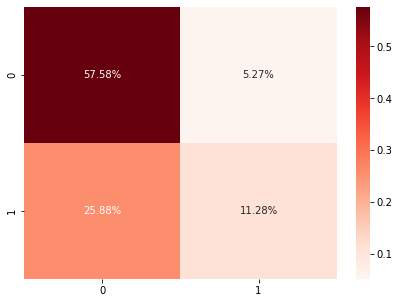

In [78]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

Model  Accuracy_score
0   SVM         0.68854

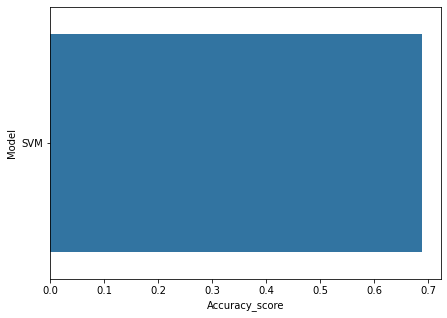

In [79]:
models = pd.DataFrame({
    'Model':['SVM'],
    'Accuracy_score' :[sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [80]:
#Using XGBoost Classifier

In [81]:
from xgboost import XGBClassifier

In [82]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [83]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=125,
              n_jobs=5, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [85]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6709796672828097


In [86]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.61      0.31      0.41       402

    accuracy                           0.67      1082
   macro avg       0.65      0.60      0.59      1082
weighted avg       0.66      0.67      0.64      1082



<AxesSubplot:>

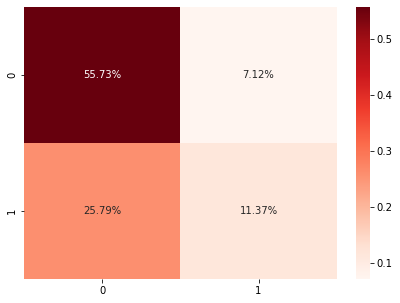

In [87]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

Model  Accuracy_score
0  XGBoost         0.67098

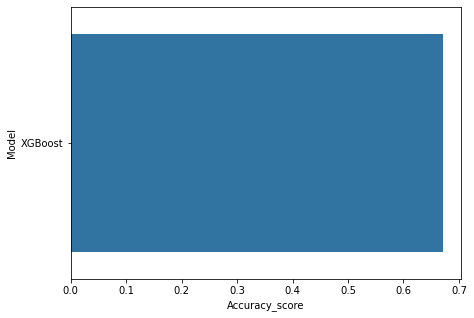

In [88]:
models = pd.DataFrame({
    'Model':['XGBoost'],
    'Accuracy_score' :[xgb]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [89]:
#Using KNeighbours

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [92]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [93]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [94]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.6534195933456562


In [95]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



In [96]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

<AxesSubplot:>

In [97]:
models = pd.DataFrame({
    'Model':['KNeighbours'],
    'Accuracy_score' :[kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Model  Accuracy_score
0  KNeighbours         0.65342

In [98]:
# Using AdaBoost Classifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier

In [100]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [101]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [102]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [103]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.634011090573013


In [104]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



In [105]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

<AxesSubplot:>

Model  Accuracy_score
0  AdaBoost        0.634011

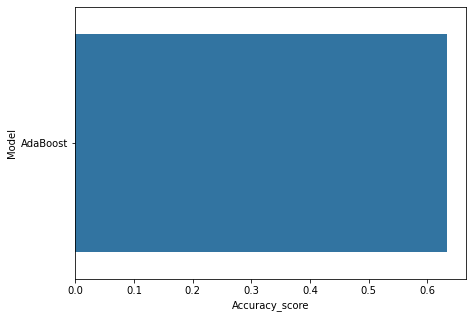

In [106]:
models = pd.DataFrame({
    'Model':['AdaBoost'],
    'Accuracy_score' :[ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [107]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Model  Accuracy_score
5                  SVM        0.688540
3              XGBoost        0.670980
4          KNeighbours        0.653420
1        Decision Tree        0.645102
6             AdaBoost        0.634011
0  Logistic Regression        0.628466
2        Random Forest        0.628466